# Machine Learning I - Assignment 04
- **Master in Data Science** - UC, UIMP, CSIC.
- **Subject**: Machine Learning I.
- **Assignment 04**: Keras for image classification
- **Author**: Ignacio Iker Prado Rujas.

The purpose of this exercise is to classify a set of images into 2 categories using Keras.

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

# Utilizando convnets con datasets pequeños

Lo primero que tienes que hacer es descargarte el dataset de https://lara.web.cern.ch/lara/train.zip en la terminal de Jupyter y descomprimirlo en la misma carpeta donde se encuentra esta libreta. 

Para descargar otro conjunto de datos desde imagenet se puede descargar la lista con las URL a las imágenes y usar `wget -i`



## Entrenando desde 0 una convNet

Entrenar un modelo de clasificación de imágenes con muy pocos datos es una situación común en la que te encontrarás si acabas dedicándote a hacer Computer Vision en un contexto profesional. 

Tener "pocas" muestras puede significar cualquier cosa entre unos pocos cientos y unas pocas decenas de miles de imágenes. Vamos a ilustrar aqui un ejemplo práctico: vamos a centrarnos en clasificar imágenes como "perros" y "gatos".


## La relevancia del Deep Learning en problemas con pocos datos

Quizás habrás oido muchas veces que el Deep Learning solo funciona cuando se tienen grandes cantidades de datos. Esto en parte es verdad: una de las características del Deep learning es que puede encontrar características interesantes a partir del dataset de entrenamiento por si mismo, y esto a priori es más sencillo cuando se tienen muchos ejemplos disponibles, especialmente en el caso de tener datasets de input con una alta dimensionalidad, como es el caso de las imágenes.

Sin embargo, lo que constituye un dataset "grande" es relativo. Concretamente relativo al tamaño y la profundidad de la red que estamos intentando entrenar. No es posible entenar una convNet para que resuelva un problema completo con solo unas decenas de ejemplos, pero unos pocos cientos puede ser suficiente si el modelo está bien montado (entenderemos que significa bien "montado" a lo largo del curso de Deep Learning).

Como las convNets aprenden características locales, invariantes bajo translaciones, son muy eficientes en cuanto al número de imágenes necesarias para llevar a cabo problemas perceptuales. Así que entrenar una convnet desde 0 con un dataset no muy grande aún nos puede llevar a resultados razonables como veremos aqui.

Pero hay más aún: los modelos de Deep Learning son altamente "reciclables". Uno puede coger, por ejemplo, un problema de clasificación de imagen y un convertidor de voz a texto entrenado sobre un dataset muy grande y luego reutilizarlo para resolver otro problema completamente distinto solo añadiéndole pequeñas modificaciones. Más especificamente, en el caso de Computer Vision, muchos modelos pre-entrenados (normalmente entrenados en el dataset ImageNet) son hechos publicos para que uno pueda descargarlos y utilizarlos para crear potentes modelos de Computer Vision con muy pocos datos. 

Pero aqui nos vamos a limitar a correr un ejemplo sencillito. 


## Los datos

El dataset de gatos vs perros que utilizamos no es un paquete de Keras. Se publicó en Kaggle.com como parte de un problema de Computer Vision a finales de 2013, cuando todavía las ConvNets no eran tan populares. 

Las imágenes son JPGEs de resolución media. Tiene este aspecto:

![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

No es ninguna sorpresa que la competición de gatos vs perros de Kaggle en 2013 fuera ganada por ConvNets. Los mejores pudieron alcanzar una precisión de hasta 95%. En nuestro ejemplo vamos a quedarnos todavía lejos de esta precisión, pero durante el curso de Deep Learning hemos aprendido como acercarnos a este valor utilizando diversos métodos para mejorar el rendimiento de las redes neuronales. Hay que tener en cuenta que en este ejemplo estamos entrenando aproximadamente sobre solo el 10% de los datos que se utilizaron para el concurso. 
Después de descargar el dataset y descomprimirlo, vamos a crear un nuevo dataset que contiene tres subsets: un set de training que contiene 1000 imágenes de cada clase, un set de validación con 500 imágenes de cada clase, y finalmente un set de test con 500 imágenes de cada clase.

Aqui tenemos unas cuantas líneas de código que nos hacen este reparto automáticamente:



In [2]:
import os, shutil

In [3]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = './train/'

# The directory where we will
# store our smaller dataset
base_dir = './cats_and_dogs_small'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

As a sanity check, let's count how many pictures we have in each training split (train/validation/test):

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [5]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [6]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [7]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [8]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [9]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500



Así que efectivamente tenemos 2000 imágenes de entrenamiento, 1000 imágenes de validación y 1000 imágenes de test. En cada uno de estos subsets hay el mismo número de ejemplos de cada clase: esto es lo que se llama un sistema de clasificación binario balanceado, lo cual significa que nuestra precisión de clasificación será una métrica adecuada del éxito de nuestra solución.

## Construyendo nuestra red

En el anterior ejemplo hemos construido una pequeña convnet para resolver el problema de clasificar números escritos a mano usando el dataset MNIST, así que ya estamos familiarizados con la terminología que utiliza keras. Vamos a reutilizar la estructura general que teniamos en el ejemplo anterior: nuestra convNet tendra una pila de capas alternadas de `Conv2D` (con activación `relu` ) y capas  `MaxPooling2D`.

Sin embargo, como estamos tratando con imágenes mayores y un problema más complejo, vamos a crear nuestra red en consecuencia: tendrá una capa más de `Conv2D` + `MaxPooling2D`. Esto sirve para aumentar la capacidad de la red y para reducir aún más el tamaño de los mapas de características, para que no sean tan enormes cuando lleguen al paso de aplanado. Empezamos usando imágenes de input de 150x150 (una elección arbitraria), y acabaremos con mapas de características que tienen un tamaño de 7x7 antes de la capa de aplanamiento.

Es importante tener en cuenta que la profundidad de los mapas de características va creciendo progresivamente según se avanza en la red neuronales ( de 32 a 128) mientras que el tamaño de los mapas de características va disminuyendo (de 148x148 a 7x7). Este patrón lo verás en casi todas las convNets.

Como estamos atacando un problema de clasificación binaria (perro o gato), vamos a acabar la red con una única unidad (una capa densa de tamaño 1) y con una activación sigmoide. Esta unidad codificará la probabilidad de que nuestra red esté mirando a una clase o a otra.

El aspecto final del modelo debe de ser el siguiente:

![modelo_red_animales.png](https://github.com/laramaktub/MachineLearningI/blob/master/modelo_red_animales.png?raw=true)

In [10]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

Para el paso de compilación utilizaremos el optimizador `RMSprop`(lr=1e-4). Como nuestra red termina con una única unidad sigmoide, vamos a utilizar binary crossentropy como nuestra función de pérdida.

In [12]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), 
              loss='binary_crossentropy', metrics=['acc'])

##  Preprocesado de datos

Las imágenes deben estar formateadas apropiadamente en tensores de flotantes antes de dárselas a la red. Esto es justo lo que vamos a hacer aqui. Antes de preprocesarlas las imágenes son archivos JPEG. Los pasos para poder darlos a nuestra red son a grandes rasgos:

* Leer los archivos con las imágenes.
* Decodificar el contenido del JPEG en una "parrilla" con el RGB de los pixels 
* Convertir esa "parrilla" en tensores de flotantes
* Re-escalar los valores de los pixels (enre 0 y 255) al intervalo [0, 1] ya que las redes neuronales prefieren trabajar con valores pequeños. 

Todo esto puede parecer muy complicado pero gracias a Keras nuestra vida es mucho más fácil y podemos contar con sus herramientas para ocuparse de estos pasos automaticamente. Keras tiene un módulo con herramientas para el tratamiento de imágenes, que se puede encontrar en  `keras.preprocessing.image`. En particular, contiene la clase `ImageDataGenerator` que nos permite automaticamente convertir imágenes que tengamos en el disco duro en tensores pre-procesados. Esto es justamente lo que usaremos a continuación. Para ello podemos utilizar el `flow_from_directory` para coger las imágenes directamente de las carpetas que generamos previamente. Le damos como entrada las carpetas donde están las imágenes de entrenamiento (o validación), el tamaño de las imágenes (target_size), tamaño del batch que vamos a usar (vamos a empezar por 20) y como solo hay dos categorías, le decimos que vamos a usar `binary_crossentropy` (`class_mode`). Al correr estos comandos obtendremos el número total de imágenes y cuantas clases hay.

In [15]:
from keras.preprocessing.image import ImageDataGenerator

# Re-escalamos las imagenes
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(directory=validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Vamos a echar un vistazo a uno de estos generadores: nos lleva a un batch de 150x150 imágenes RGB (dimensiones `(20, 150, 150, 3)`) y etiquetas binarias (dimensión `(20,)`). 20 es el número de ejemplos en cada batch (lo que llamamos el tamaño del batch). El generador genera estos batches de manera indefinida: corre un bucle sin cesar por todas las imágenes que tengamos en la carpeta. Por eso tenemos que escribir `break` para romper el bucle en algún momento.


In [16]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


## Entrenando la red 

Ahora vamos a hacer el fit. En este caso, como lo que tenemos es un generator, utilizamos `fit_generator`. Vamos a correr 30 épocas y a utilizar el dataset de validación.

In [20]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 128s 1s/step - loss: 0.6906 - acc: 0.5395 - val_loss: 0.6763 - val_acc: 0.5540
Epoch 2/30
100/100 [==============================] - 124s 1s/step - loss: 0.6609 - acc: 0.6105 - val_loss: 0.6473 - val_acc: 0.6180
Epoch 3/30
100/100 [==============================] - 122s 1s/step - loss: 0.6159 - acc: 0.6680 - val_loss: 0.6086 - val_acc: 0.6800
Epoch 4/30
100/100 [==============================] - 123s 1s/step - loss: 0.5721 - acc: 0.7050 - val_loss: 0.5807 - val_acc: 0.6980
Epoch 5/30
100/100 [==============================] - 105s 1s/step - loss: 0.5268 - acc: 0.7285 - val_loss: 0.5652 - val_acc: 0.7000
Epoch 6/30
100/100 [==============================] - 103s 1s/step - loss: 0.5011 - acc: 0.7515 - val_loss: 0.5722 - val_acc: 0.7020
Epoch 7/30
100/100 [==============================] - 134s 1s/step - loss: 0.4713 - acc: 0.7715 - val_loss: 0.5687 - val_acc: 0.7050
Epoch 8/30
100/100 [==============================] - 137s 1s/step - 

Es una buena idea guardar el modelo después de entrenar:

In [21]:
model.save('net_cats_dogs.h5')

Ahora evalua el modelo en el dataset de test.

In [33]:
test_generator = test_datagen.flow_from_directory(directory=test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=100,
                                                  class_mode='binary')

Found 1000 images belonging to 2 classes.


In [43]:
test_loss, test_acc = model.evaluate_generator(generator=test_generator, 
                                               steps=None, verbose=1)

10/10 [==============================] - 20s 2s/step


In [44]:
print('Con el conjunto de test, las perdidas son {0}, y el accuracy {1}'.format(test_loss, test_acc))

Con el conjunto de test, las perdidas son 0.9838724851608276, y el accuracy 0.7290000021457672


Prueba a optimizar la red. Para ello puedes utilizar las herramientas utilizadas en clase. Puedes probar a optimizar en términos de velocidad y de accuracy. Comenta los resultados.

# Ahora con bicicletas y motos

## Los datos

Descargamos datos desde ImageNet. Para ello podemos ejecutar estas líneas como un script de bash:
```
#!/bin/bash

mkdir -p wheels/scooters
cd wheels/scooters
wget -i http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n03791053 --timeout=5 --tries=2
    
mkdir ../bicycles
cd ../bicycles
wget -i http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n03792782 --timeout=5 --tries=2
```

Aquí es importante destacar que `wget` tiene [por defecto](https://stackoverflow.com/questions/2291524/does-wget-timeout) un `timeout` de 900 segundos. Con varios cientos de imágenes como tenemos, no podemos permitirnos esperar tanto para cada una de ellas que no esté disponible o esté alojada en un servidor lento, por lo tanto lo rebajamos a 5 segundos. También, fijamos a 2 el número de veces que se reintenta descargar una imagen tras un error.

In [59]:
!ls -l ./wheels/bicycles/ | wc -l
!ls -l ./wheels/scooters/ | wc -l

983
949


El número de scooters y de bicletas está bastante equilibrado. La pinta que tienen las imágenes es esta:

![bike1](https://farm2.static.flickr.com/1350/659758592_106cd4c7e6.jpg)
![scooter1](http://farm3.static.flickr.com/2230/1627734819_cde36c4e4b.jpg)

Ahora, reutilizamos el código anterior para separarlas en train-validation-test:

In [78]:
import glob
from PIL import Image

# The path to the directory where the original dataset was uncompressed
original_dataset_dir = './wheels/'

# The directory where we will store our smaller dataset
base_dir = './bikes_and_scooters'
os.mkdir(base_dir)

# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training bikes pictures
train_bikes_dir = os.path.join(train_dir, 'bikes')
os.mkdir(train_bikes_dir)

# Directory with our training scooters pictures
train_scooters_dir = os.path.join(train_dir, 'scooters')
os.mkdir(train_scooters_dir)

# Directory with our validation bikes pictures
validation_bikes_dir = os.path.join(validation_dir, 'bikes')
os.mkdir(validation_bikes_dir)

# Directory with our validation scooters pictures
validation_scooters_dir = os.path.join(validation_dir, 'scooters')
os.mkdir(validation_scooters_dir)

# Directory with our test bikes pictures
test_bikes_dir = os.path.join(test_dir, 'bikes')
os.mkdir(test_bikes_dir)

# Directory with our test scooters pictures
test_scooters_dir = os.path.join(test_dir, 'scooters')
os.mkdir(test_scooters_dir)

# Copy first 500 bike images to train_bikes_dir,
# next 250 to validation_bikes_dir and last ones to test_bikes_dir
bad_bikes = []
target_dir = train_bikes_dir
for idx, fpath in enumerate(glob.glob(original_dataset_dir + 'bicycles/*')):
    if idx == 500:
        target_dir = validation_bikes_dir
    elif idx == 750:
        target_dir = test_bikes_dir
    try:
        img = Image.open(fpath)
        img.verify()
    except(IOError, SyntaxError) as e:
        bad_bikes.append(fpath)
        continue
    dst = os.path.join(target_dir, '{}.jpg'.format(idx))
    shutil.copyfile(fpath, dst)

# Copy first 500 scooter images to train_scooter_dir,
# next 250 to validation_scooter_dir and last ones to test_scooter_dir
bad_scooters = []
target_dir = train_scooters_dir
for idx, fpath in enumerate(glob.glob(original_dataset_dir + 'scooters/*')):
    if idx == 500:
        target_dir = validation_scooters_dir
    elif idx == 750:
        target_dir = test_scooters_dir
    try:
        img = Image.open(fpath)
        img.verify()
    except(IOError, SyntaxError) as e:
        bad_scooters.append(fpath)
        continue
    dst = os.path.join(target_dir, '{}.jpg'.format(idx))
    shutil.copyfile(fpath, dst)
    

print('Hay {} imágenes de bicicletas rotas, y {} de scooters'.format(len(bad_bikes), len(bad_scooters)))

Hay 70 imágenes de bicicletas rotas, y 60 de scooters


Hemos evitado copiar las imágenes que no se podían abrir como tal.  
Cabe destacar que a pesar de filtrar las imágenes rotas, hay algunas que están vacías o son erroneas, o incluso contienen gifs como este:
![bike1](http://www.soccorritoripeda.it/ItinerariMTB/FotoSlide/Slide.gif)

Sanity check de las proporciones train-validation-test:

In [79]:
!ls -l ./bikes_and_scooters/train/bikes/ | wc -l
!ls -l ./bikes_and_scooters/train/scooters/ | wc -l
!ls -l ./bikes_and_scooters/validation/bikes/ | wc -l
!ls -l ./bikes_and_scooters/validation/scooters/ | wc -l
!ls -l ./bikes_and_scooters/test/bikes/ | wc -l
!ls -l ./bikes_and_scooters/test/scooters/ | wc -l

467
473
230
233
218
185


## Construyendo la red

Vamos a intentar volver a utilizar la topología del modelo anterior:

In [97]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [101]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), 
              loss='binary_crossentropy', metrics=['acc'])

## Preprocesando los datos 

In [102]:
from keras.preprocessing.image import ImageDataGenerator

# Re-escalamos las imagenes
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(directory=validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 938 images belonging to 2 classes.
Found 461 images belonging to 2 classes.


In [103]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


## Entrenando la red 

Problema con algunas imágenes truncadas y posible solución [aquí](https://stackoverflow.com/questions/12984426/python-pil-ioerror-image-file-truncated-with-big-images):

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 136s 1s/step - loss: 0.5969 - acc: 0.6709 - val_loss: 0.5200 - val_acc: 0.7526
Epoch 2/30
100/100 [==============================] - 127s 1s/step - loss: 0.4714 - acc: 0.7885 - val_loss: 0.4218 - val_acc: 0.8025
Epoch 3/30
100/100 [==============================] - 126s 1s/step - loss: 0.4435 - acc: 0.7857 - val_loss: 0.7033 - val_acc: 0.6268
Epoch 4/30
 55/100 [===============>..............] - ETA: 50s - loss: 0.3851 - acc: 0.8192

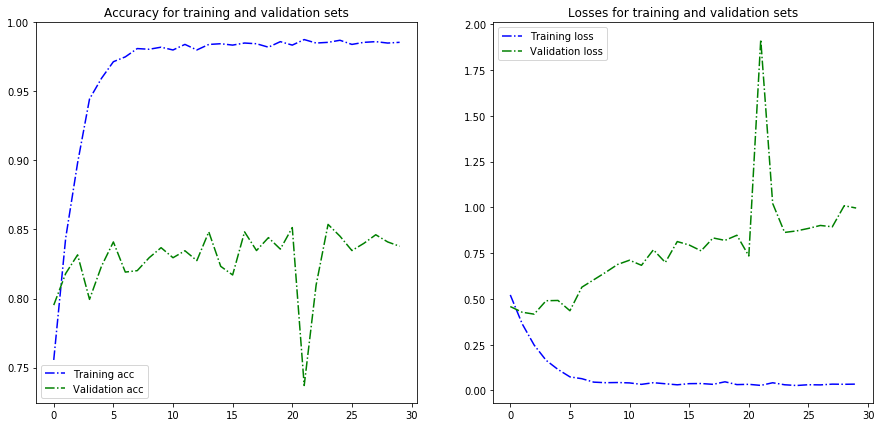

In [89]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 7)

# Accuracy
ax[0].plot(range(30), history.history['acc'], 
           'b-.', label='Training acc')
ax[0].plot(range(30), history.history['val_acc'], 
           'g-.', label='Validation acc')
ax[0].set_title('Accuracy for training and validation sets')
ax[0].legend()

# Loss
ax[1].plot(range(30), history.history['loss'], 
           'b-.', label='Training loss')
ax[1].plot(range(30), history.history['val_loss'], 
           'g-.', label='Validation loss')
ax[1].set_title('Losses for training and validation sets')
ax[1].legend()

plt.show()

Guardamos el modelo:

In [ ]:
model.save('net_bikes_scooters.h5')

Ahora evalua el modelo en el dataset de test.

In [ ]:
test_generator = test_datagen.flow_from_directory(directory=test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=100,
                                                  class_mode='binary')

In [95]:
test_loss, test_acc = model.evaluate_generator(generator=test_generator, 
                                               steps=None, verbose=1)

5/5 [==============================] - 12s 2s/step


In [96]:
print('Con el conjunto de test, las perdidas son {0}, y el accuracy {1}'.format(test_loss, test_acc))

Con el conjunto de test, las perdidas son 1.4635435812012099, y el accuracy 0.7930174605210226


## Con early-stopping:

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), 
              loss='binary_crossentropy', metrics=['acc'])

In [ ]:
early_stop = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]

history1 = model.fit_generator(generator=train_generator,
                               steps_per_epoch=100,
                               epochs=30,
                               validation_data=validation_generator,
                               validation_steps=50, 
                               callbacks=early_stop)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 7)

# Accuracy
ax[0].plot(range(5), history1.history['acc'], 
           'b-.', label='Training acc')
ax[0].plot(range(5), history1.history['val_acc'], 
           'g-.', label='Validation acc')
ax[0].set_title('Accuracy for training and validation sets')
ax[0].legend()

# Loss
ax[1].plot(range(5), history1.history['loss'], 
           'b-.', label='Training loss')
ax[1].plot(range(5), history1.history['val_loss'], 
           'g-.', label='Validation loss')
ax[1].set_title('Losses for training and validation sets')
ax[1].legend()

plt.show()

Guardamos el modelo:

In [ ]:
model.save('net_bikes_scooters_early.h5')

Ahora evalua el modelo en el dataset de test.

In [ ]:
test_generator = test_datagen.flow_from_directory(directory=test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=100,
                                                  class_mode='binary')

In [ ]:
test_loss, test_acc = model.evaluate_generator(generator=test_generator, 
                                               steps=None, verbose=1)

In [ ]:
print('Con el conjunto de test, las perdidas son {0}, y el accuracy {1}'.format(test_loss, test_acc))